## Cussac data munging

Cleaning data for tweeters from new york.



In [22]:
import pandas as pd
import numpy as np
import re
import pylab as pl
%pylab inline
pl.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [23]:
#Loading data

nov = pd.read_csv('followers_nov.csv', index_col = 0)
dec = pd.read_csv('followers_dec.csv', index_col = 0)
f0 = pd.read_csv('followers_feb0.csv', index_col = 0)
f1 = pd.read_csv('followers_feb1.csv', index_col = 0)
f2 = pd.read_csv('followers_feb2.csv', index_col = 0)
feb = pd.concat([f0, f1, f2], axis = 0, ignore_index=True)

In [24]:
#Removing duplicate usernames and extra values
total = pd.concat([feb,dec,nov], axis = 0, ignore_index=True)
total = total.drop_duplicates(subset='username')

#Removing values with 'username' and 'followers' in columns
total = total[total['username'] != 'username']
total = total.reset_index()
total = total.drop('index', axis = 1)


dec = dec.drop_duplicates(subset='username')
dec = dec[dec['username'] != 'username']
print total.head()
print len(total)

   index       username followers
0      0  Anthony_Zayas        80
1      1    Taaaiki0407       721
2      2  harlanerskine      1554
3      3    S__Hysteria       192
4      4     janeelkins       910
80274


In [25]:
total['followers'] = (total['followers']).astype('int')
dec['followers'] = (dec['followers']).astype('int')

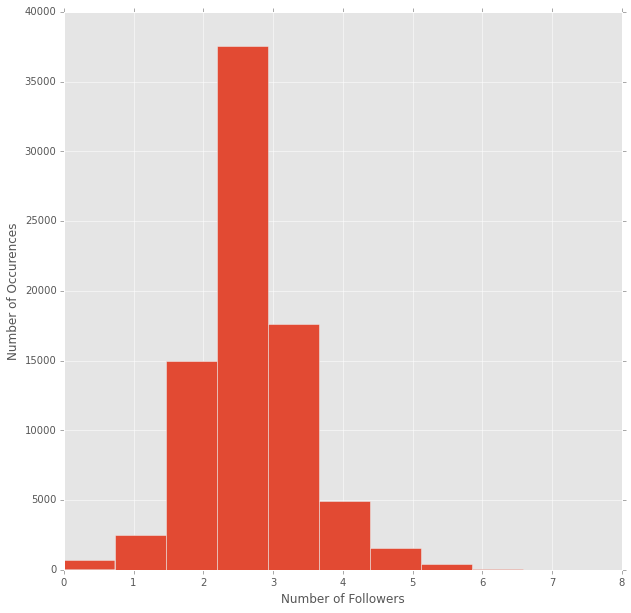

In [26]:
pl.figure(figsize=(10, 10))
pl.hist(np.log10(total['followers']))
pl.xlabel("Number of Followers")
pl.ylabel("Number of Occurences")
#pl.axis(ymax = 5000, xmax = 5000)

35544

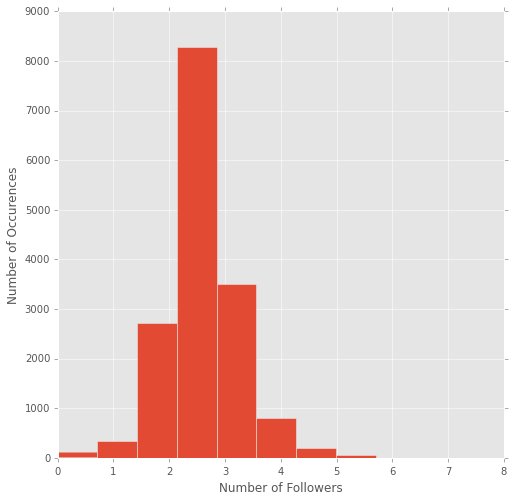

In [27]:
pl.figure(figsize=(8, 8))
pl.hist(np.log10(dec['followers']))
pl.xlabel("Number of Followers")
pl.ylabel("Number of Occurences")
(total['followers']>500).sum()

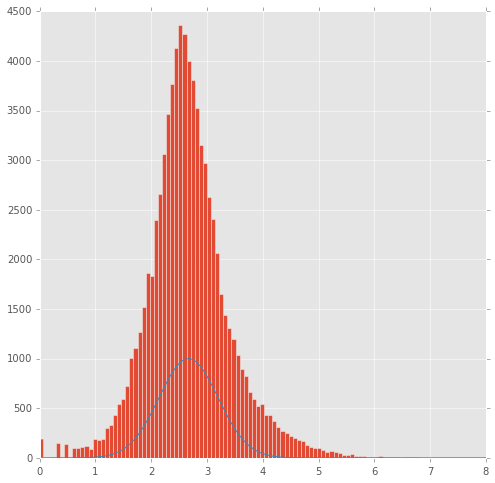

In [28]:
pl.figure(figsize = (8,8))
pl.hist(np.log10(total['followers']),100)
xx = np.linspace(0,8,1000)
yy = 1000*np.exp(-(xx-np.log10(total['followers']).mean())**2/(1.0*np.log10(total['followers']).std()**2))
pl.plot(xx,yy)

In [29]:
print "No of users : " + str(len(total['followers']))
print "Users w/ Greater than 500 followers : " + str(len(total[total['followers'] > 500]))
print "Max followers : " + str(max((total['followers'])))

No of users : 80274
Users w/ Greater than 500 followers : 35544
Max followers : 20800000


In [41]:
nyers_sets = np.array_split(total, 10)
for nyer in nyers_sets:
    print nyer.head()

        username  followers
0  Anthony_Zayas         80
1    Taaaiki0407        721
2  harlanerskine       1554
3    S__Hysteria        192
4     janeelkins        910
            username  followers
8028         Dfyeant       1055
8029    silvino19832         26
8030  KaitlynLatelyy        441
8031     HanaNitsche       8267
8032        Najvasol       1261
            username  followers
16056   affanzawkari         48
16057      MonJarcus        131
16058        Treshiq        241
16059   CakeinaCupNY        541
16060  risssssssssss        545
              username  followers
24084  sincerelyserita       1806
24085     FromMyMellin        998
24086  JosephDDiMatteo         36
24087         Buhsifer        216
24088  ElliotWoodwoooo        148
            username  followers
32112    NoraSkinner        497
32113  BulldogShadow       1266
32114      greco1347         49
32115     DannyyOsaa        439
32116            mep       2159
            username  followers
40139        NRassed

10

8027